# Code for plots in the directional filter paper

#### Importing

In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
from cycler import cycler

from filterbank.components import Filterbank, TransmissionLine, ManifoldFilter, DirectionalFilter, BaseFilter

plt.style.use('~/Repos/louis-style-docs/default.mplstyle')

fig_path = "~/Repos/filterbank-performance/paper_dir_filter_figures/"


#### Settings

In [2]:
nF = int(2e4)
f = np.linspace(210e9,450e9,nF)

f0_single = 330e9

f0_min = 220e9
f0_max = 440e9

## Variances
sigma_Ql = 0.2
sigma_f0 = 0.085


Z0_res = 80
eps_eff_res = 40
Qi_res = 1800


Z0_thru = 80
eps_eff_thru = 40

TL_thru = TransmissionLine(Z0_thru,eps_eff_thru)

TL_res = TransmissionLine(Z0_res,eps_eff_res,Qi=np.inf)
TL_res_lossy = TransmissionLine(Z0_res,eps_eff_res,Qi=Qi_res)

TransmissionLinesDict = {
    'through' : TL_thru,
    'resonator' : TL_res,
    'MKID' : TL_thru
}

TransmissionLinesLossyDict = {
    'through' : TL_thru,
    'resonator' : TL_res_lossy,
    'MKID' : TL_thru
}



#### Generate numerical models

In [3]:
#-----------------------------
single_filter_MF = ManifoldFilter(
    f0=f0_single,
    Ql=500,
    TransmissionLines=TransmissionLinesDict,
    compensate=False
)
single_filter_MF.S(f)
single_filter_MF.realized_parameters()

single_filter_DF = DirectionalFilter(
    f0=f0_single,
    Ql=500,
    TransmissionLines=TransmissionLinesDict,
    compensate=False
)
single_filter_DF.S(f)
single_filter_DF.realized_parameters()
#-----------------------------



#-----------------------------
## Manifold filter, no variance
FB_MF_no_variance = Filterbank(
    FilterClass=ManifoldFilter,
    TransmissionLines=TransmissionLinesDict,
    f0_min=f0_min,
    f0_max=f0_max,
    Ql=500,
    oversampling=1,
    sigma_f0=0,
    sigma_Ql=0,
    compensate=False
)
FB_MF_no_variance.S(f)
FB_MF_no_variance.realized_parameters()

## Manifold filter, variance
FB_MF_variance = Filterbank(
    FilterClass=ManifoldFilter,
    TransmissionLines=TransmissionLinesLossyDict,
    f0_min=f0_min,
    f0_max=f0_max,
    Ql=500,
    oversampling=1,
    sigma_f0=sigma_f0,
    sigma_Ql=sigma_Ql,
    compensate=False
)
FB_MF_variance.S(f)
FB_MF_variance.realized_parameters()
#-----------------------------



#-----------------------------
## Directional filter, no variance
FB_DF_no_variance = Filterbank(
    FilterClass=DirectionalFilter,
    TransmissionLines=TransmissionLinesDict,
    f0_min=f0_min,
    f0_max=f0_max,
    Ql=500,
    oversampling=1,
    sigma_f0=0,
    sigma_Ql=0,
    compensate=False
)
FB_DF_no_variance.S(f)
FB_DF_no_variance.realized_parameters()

## Directional filter, variance
FB_DF_variance = Filterbank(
    FilterClass=DirectionalFilter,
    TransmissionLines=TransmissionLinesLossyDict,
    f0_min=f0_min,
    f0_max=f0_max,
    Ql=500,
    oversampling=1,
    sigma_f0=sigma_f0,
    sigma_Ql=sigma_Ql,
    compensate=False
)
FB_DF_variance.S(f)
FB_DF_variance.realized_parameters()
#-----------------------------

(array([4.39223373e+11, 4.38263371e+11, 4.37351368e+11, 4.36631367e+11,
        4.35671364e+11, 4.34687362e+11, 4.33895360e+11, 4.32911357e+11,
        4.32202756e+11, 4.31218753e+11, 4.30402751e+11, 4.29526749e+11,
        4.28698747e+11, 4.27894745e+11, 4.26970742e+11, 4.26130740e+11,
        4.25386738e+11, 4.24498736e+11, 4.23646734e+11, 4.22758132e+11,
        4.21930730e+11, 4.21174728e+11, 4.20202126e+11, 4.19482724e+11,
        4.18606122e+11, 4.17670119e+11, 4.16914117e+11, 4.16110115e+11,
        4.15198113e+11, 4.14310111e+11, 4.13626109e+11, 4.12726107e+11,
        4.11862105e+11, 4.11058103e+11, 4.10266101e+11, 4.09462099e+11,
        4.08646097e+11, 4.07817495e+11, 4.07013493e+11, 4.06234091e+11,
        4.05441489e+11, 4.04566086e+11, 4.03773484e+11, 4.02970082e+11,
        4.02273481e+11, 4.01457479e+11, 4.00534076e+11, 3.99717474e+11,
        3.99093473e+11, 3.98193470e+11, 3.97341468e+11, 3.96633467e+11,
        3.95816865e+11, 3.95025463e+11, 3.94256861e+11, 3.933928

#### Plotting functions

In [4]:
def plot_centered():
    plot = plt.gcf()
    return plot.add_axes([0.18,0.15,0.64,0.75])

def plotstep_add_S_params(f, Filter: BaseFilter,ax: plt.Axes=None):
    if ax == None:
        ax = plt.gca()

    S_param_list = [
        Filter.S11_absSq,
        Filter.S21_absSq,
        Filter.S31_absSq
    ]

    if Filter.S41_absSq is not None:
        S_param_list.append(Filter.S41_absSq)

    return [line for Sii in S_param_list for line in ax.plot(f/1e9, Sii)]

def plotstep_percentage(lines):
    for line in lines:
        line.set_ydata(line.get_ydata()*100)
        line.axes.set_ylim(0,100)

def plotstep_dB(lines):
    for line in lines:
        line.set_ydata(10*np.log10(line.get_ydata()))
        line.axes.set_ylim(-30,0)

def plotstep_add_filterbank(f, FB: Filterbank, ax: plt.Axes=None):
    if ax == None:
        ax = plt.gca()

    S31_all = FB.S31_absSq_list

    #ax
    cmap = cm.get_cmap('rainbow').copy()
    norm = mpl.colors.Normalize(vmin=0, vmax=FB.n_filters)

    return [line for i,S31_absSq in enumerate(S31_all) for line in ax.plot(f/1e9,S31_absSq,color=cmap(norm(i)))]
    
def make_bins_from_max(x,y,binwidth=0.05):
    max_xy = np.max((np.max(np.abs(x)), np.max(np.abs(y))))
    binlim = (int(max_xy/binwidth) + 1) * binwidth
    return np.arange(-binlim, binlim + binwidth, binwidth)

def format_compact_grid(fig):
    for index,ax in enumerate(fig.axes):
        ss = ax.get_subplotspec()
        ax.sharey(fig.axes[0])
        ax.sharex(fig.axes[0])
        
        ax.tick_params(labelleft=ss.is_first_col())
        ax.tick_params(labelright=ss.is_last_col())
        ax.tick_params(labelbottom=ss.is_last_row())
        ax.tick_params(labeltop=ss.is_first_row())

def violinplot_pretty(ax,data,labels=None):
    vplot = ax.violinplot(data,showmedians=True)
    ax.yaxis.grid(True)
    ax.set_xticks([1,2],labels=labels)
    ax.tick_params(axis="x",which="minor",length=0)

    vplot["cmedians"].set_linewidth(2)
    vplot["cmedians"].set_color("C3")

    colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    for violin_patch, color in zip(vplot["bodies"],colors[:len(vplot["bodies"])]):
        violin_patch.set_facecolor(color)
        violin_patch.set_alpha(0.5)

## Single filter numerical and analytical model

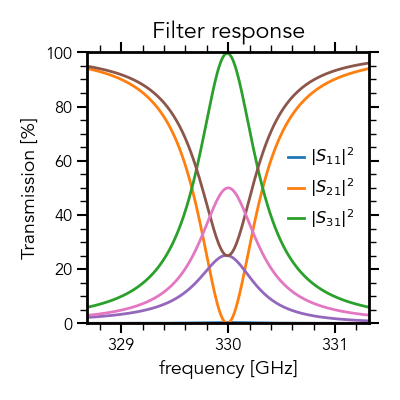

In [5]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot()

lines_DF = plotstep_add_S_params(f,single_filter_DF)
labels = [r'$|S_{11}|^2$',r'$|S_{21}|^2$',r'$|S_{31}|^2$']
lines = lines_DF

lines_MF = plotstep_add_S_params(f,single_filter_MF)
lines += lines_MF

plotstep_percentage(lines)

ax.set_xlabel('frequency [GHz]')  # Add an x-label to the axes.
ax.set_ylabel('Transmission [%]')  # Add a y-label to the axes.
# ax.set_ylim(0,100)
ax.set_xlim((f0_single-2*f0_single/500)/1e9,(f0_single+2*f0_single/500)/1e9)
ax.set_title("Filter response")  # Add a title to the axes.
ax.legend(lines_DF,labels,loc="right",frameon=False);  # Add a legend.
savestr = fig_path + "single_filter_manifold.png"
# fig.savefig(fname=savestr)
fig.set_tight_layout(True)
plt.show()

## Filterbank

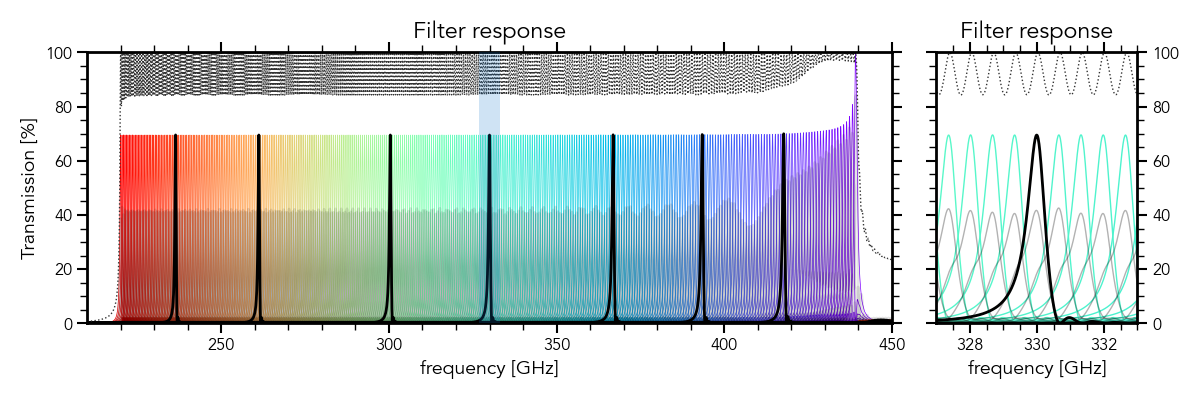

In [6]:
fig = plt.figure(figsize=(12,4))
plt.rcParams['lines.linewidth'] = 0.5
gs = fig.add_gridspec(1,2,width_ratios=[4,1])

##### Filterbank plot, comparison
ax = fig.add_subplot(gs[0, 0])

lines_DF = plotstep_add_filterbank(f,FB_DF_no_variance)
lines = lines_DF

lines_MF = plotstep_add_filterbank(f,FB_MF_no_variance)
lines += lines_MF

for line in lines_MF:
    line.set_color("black")
    line.set_alpha(0.1)
    line.set_linewidth(2)

# Sum of filters
sum_filters = np.sum(FB_DF_no_variance.S31_absSq_list,axis=0)
lines += ax.plot(f/1e9,sum_filters,label='sum filters',color="0.2",linestyle=":",linewidth=1)


## highlight several individual filters
highlight_index = [25,55,90,143,190,260,310]

for index in highlight_index:
    lines += ax.plot(f/1e9,FB_DF_no_variance.S31_absSq_list[index],color="0.0",linewidth=2)


# Make in percentage
plotstep_percentage(lines)


## Highlight zoom section
f_zoom = np.array([327e9,333e9])

left, bottom, width, height = (f_zoom[0]/1e9, 0, (f_zoom[1]-f_zoom[0])/1e9,100)
rect = plt.Rectangle((left, bottom), width, height, facecolor="#17C", alpha=0.2,zorder=1000)

ax.add_patch(rect)


ax.set_xlabel('frequency [GHz]')  # Add an x-label to the axes.
ax.set_ylabel('Transmission [%]')  # Add a y-label to the axes.
# ax.set_ylim(0,100)
ax.set_xlim(min(f)/1e9,max(f)/1e9)
ax.set_title("Filter response")  # Add a title to the axes.
# ax.legend(lines_DF,labels,loc="right",frameon=False);  # Add a legend.
## ----------------------------------


##### zoom in on section of filterbank
ax_zoom = fig.add_subplot(gs[0, 1],sharey=ax)
ax_zoom.tick_params(labelleft=False,labelright=True)

lines_DF = plotstep_add_filterbank(f,FB_DF_no_variance)
lines = lines_DF

for line in lines_DF:
    line.set_linewidth(1)

lines_MF = plotstep_add_filterbank(f,FB_MF_no_variance)
lines += lines_MF

for line in lines_MF:
    line.set_color("black")
    line.set_alpha(0.3)
    line.set_linewidth(1)


# highlight a filter in zoom in
lines += ax_zoom.plot(f/1e9,FB_DF_no_variance.S31_absSq_list[highlight_index[3]],color="0.0",linewidth=2)

# Sum of filters
sum_filters = np.sum(FB_DF_no_variance.S31_absSq_list,axis=0)
lines += ax_zoom.plot(f/1e9,sum_filters,label='sum filters',color="0.2",linestyle=":",linewidth=1)

plotstep_percentage(lines)

ax_zoom.set_xlabel('frequency [GHz]')  # Add an x-label to the axes.
ax_zoom.set_xlim(f_zoom[0]/1e9,f_zoom[1]/1e9)
ax_zoom.set_title("Filter response")  # Add a title to the axes.

# save and plot figure
savestr = fig_path + "filterbank_comparison.png"
# fig.savefig(fname=savestr)
fig.set_tight_layout(True)
plt.show()

## Scatterplot of f0 and Ql

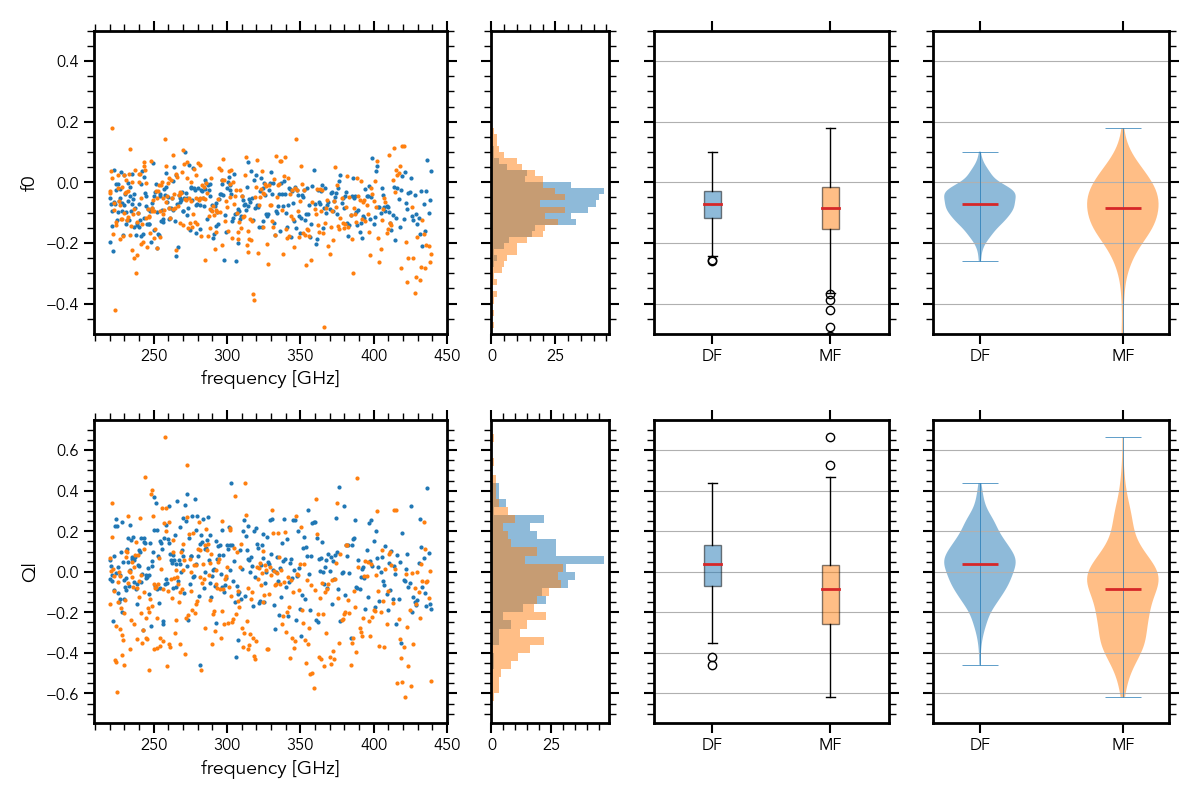

In [7]:
fig = plt.figure(figsize=(12,8))
gs = fig.add_gridspec(2,4,width_ratios=[3,1,2,2])

f0 = FB_DF_variance.f0
Ql = FB_DF_variance.Ql
f0_DF, Ql_DF, _, _, = FB_DF_variance.realized_parameters()
f0_MF, Ql_MF, _, _, = FB_MF_variance.realized_parameters()

df_norm = f0/Ql
df0_DF = (f0_DF-f0)/df_norm
df0_MF = (f0_MF-f0)/df_norm

dQl_DF = (Ql_DF-Ql)/Ql
dQl_MF = (Ql_MF-Ql)/Ql

# f0 --------------------------------------
ax = fig.add_subplot(gs[0,0])
ax.scatter(f0/1e9,df0_DF)
ax.scatter(f0/1e9,df0_MF)
ax.set_xlabel('frequency [GHz]')  # Add an x-label to the axes.
ax.set_ylabel('f0')  # Add a y-label to the axes.

# Histogram
ax_hist = fig.add_subplot(gs[0,1],sharey=ax)

bins = make_bins_from_max(df0_DF,df0_MF,binwidth=0.02)
ax_hist.hist(df0_DF,orientation='horizontal',bins=bins,alpha=0.5)
ax_hist.hist(df0_MF,orientation='horizontal',bins=bins,alpha=0.5)
ax_hist.tick_params(labelleft=False)

# Boxplot
ax_boxplot = fig.add_subplot(gs[0,2],sharey=ax)

bplot = ax_boxplot.boxplot([df0_DF,df0_MF],patch_artist=True,medianprops={"color":"C3","linewidth":2})
ax_boxplot.yaxis.grid(True)
ax_boxplot.set_xticks([1,2],labels=["DF","MF"])
ax_boxplot.tick_params(labelleft=False)
ax_boxplot.tick_params(axis="x",which="minor",length=0)

colors = ["C0","C1"]
for box_patch, color in zip(bplot["boxes"],colors):
    box_patch.set_facecolor(color)
    box_patch.set_alpha(0.5)

# Violinplot
ax_violinplot = fig.add_subplot(gs[0,3],sharey=ax)
vplot = ax_violinplot.violinplot([df0_DF,df0_MF],showmedians=True)
ax_violinplot.yaxis.grid(True)
ax_violinplot.set_xticks([1,2],labels=["DF","MF"])
ax_violinplot.tick_params(labelleft=False)
ax_violinplot.tick_params(axis="x",which="minor",length=0)

vplot["cmedians"].set_linewidth(2)
vplot["cmedians"].set_color("C3")

for violin_patch, color in zip(vplot["bodies"],colors):
    violin_patch.set_facecolor(color)
    violin_patch.set_alpha(0.5)

ax.set_ylim(-0.5,0.5)
#----------------------------------------------------------------------


# Ql --------------------------------------
ax = fig.add_subplot(gs[1,0])
ax.scatter(f0/1e9,dQl_DF)
ax.scatter(f0/1e9,dQl_MF)
ax.set_xlabel('frequency [GHz]')  # Add an x-label to the axes.
ax.set_ylabel('Ql')  # Add a y-label to the axes.


# Histogram
ax_hist = fig.add_subplot(gs[1,1],sharey=ax)

bins = make_bins_from_max(dQl_DF,dQl_MF,binwidth=0.04)
ax_hist.hist(dQl_DF,orientation='horizontal',bins=bins,alpha=0.5)
ax_hist.hist(dQl_MF,orientation='horizontal',bins=bins,alpha=0.5)

ax_hist.tick_params(labelleft=False)

# Boxplot
ax_boxplot = fig.add_subplot(gs[1,2],sharey=ax)

bplot = ax_boxplot.boxplot([dQl_DF,dQl_MF],patch_artist=True,medianprops={"color":"C3","linewidth":2})
ax_boxplot.yaxis.grid(True)
ax_boxplot.set_xticks([1,2],labels=["DF","MF"])
ax_boxplot.tick_params(labelleft=False)
ax_boxplot.tick_params(axis="x",which="minor",length=0)

colors = ["C0","C1"]
for box_patch, color in zip(bplot["boxes"],colors):
    box_patch.set_facecolor(color)
    box_patch.set_alpha(0.5)

# Violinplot
ax_violinplot = fig.add_subplot(gs[1,3],sharey=ax)
ax_violinplot.tick_params(labelleft=False)
violinplot_pretty(ax_violinplot,[dQl_DF,dQl_MF],["DF","MF"])
# ax.set_ybound(lower=0)
# ax_hist.set_ylim(-0.7,0.3)
#-----------------------------------------------------------------------

## Grid Simulation of spectral resolution and oversampling

In [8]:
nF = int(8e3)
f_sparse = np.linspace(210e9,450e9,nF)
os = np.array([0.8,0.9,1.,1.25,1.5,2.])

Rx_filter = np.flip(np.array([25, 300, 400, 500, 600])) # flip axis to 
Ry_spacing = np.outer(Rx_filter,os)
nRx = len(Rx_filter)
nRy = len(Ry_spacing.T)

f0_grid     = {}
f0_DF_grid  = {}
f0_MF_grid  = {}
Ql_DF_grid  = {}
Ql_MF_grid  = {}
eta_DF_grid = {}
eta_MF_grid = {}


for i, Rx in enumerate(Rx_filter):
    for j, Ry in enumerate(Ry_spacing[i,:]):
        FB_DF_variance.__init__(
            FilterClass=DirectionalFilter,
            TransmissionLines=TransmissionLinesLossyDict,
            f0_min=f0_min,
            f0_max=f0_max,
            Ql=Rx,
            oversampling=Ry/Rx,
            sigma_f0=sigma_f0 * (Rx/500),
            sigma_Ql=sigma_Ql,
            compensate=False
        )

        FB_MF_variance.__init__(
            FilterClass=ManifoldFilter,
            TransmissionLines=TransmissionLinesLossyDict,
            f0_min=f0_min,
            f0_max=f0_max,
            Ql=Rx,
            oversampling=Ry/Rx,
            sigma_f0=sigma_f0 * (Rx/500),
            sigma_Ql=sigma_Ql,
            compensate=False
        )

        FB_DF_variance.S(f)
        FB_MF_variance.S(f)

        f0_grid[i,j] = FB_DF_variance.f0

        f0_DF_grid[i,j], Ql_DF_grid[i,j], eta_DF_grid[i,j], _, = FB_DF_variance.realized_parameters()
        f0_MF_grid[i,j], Ql_MF_grid[i,j], eta_MF_grid[i,j], _, = FB_MF_variance.realized_parameters()


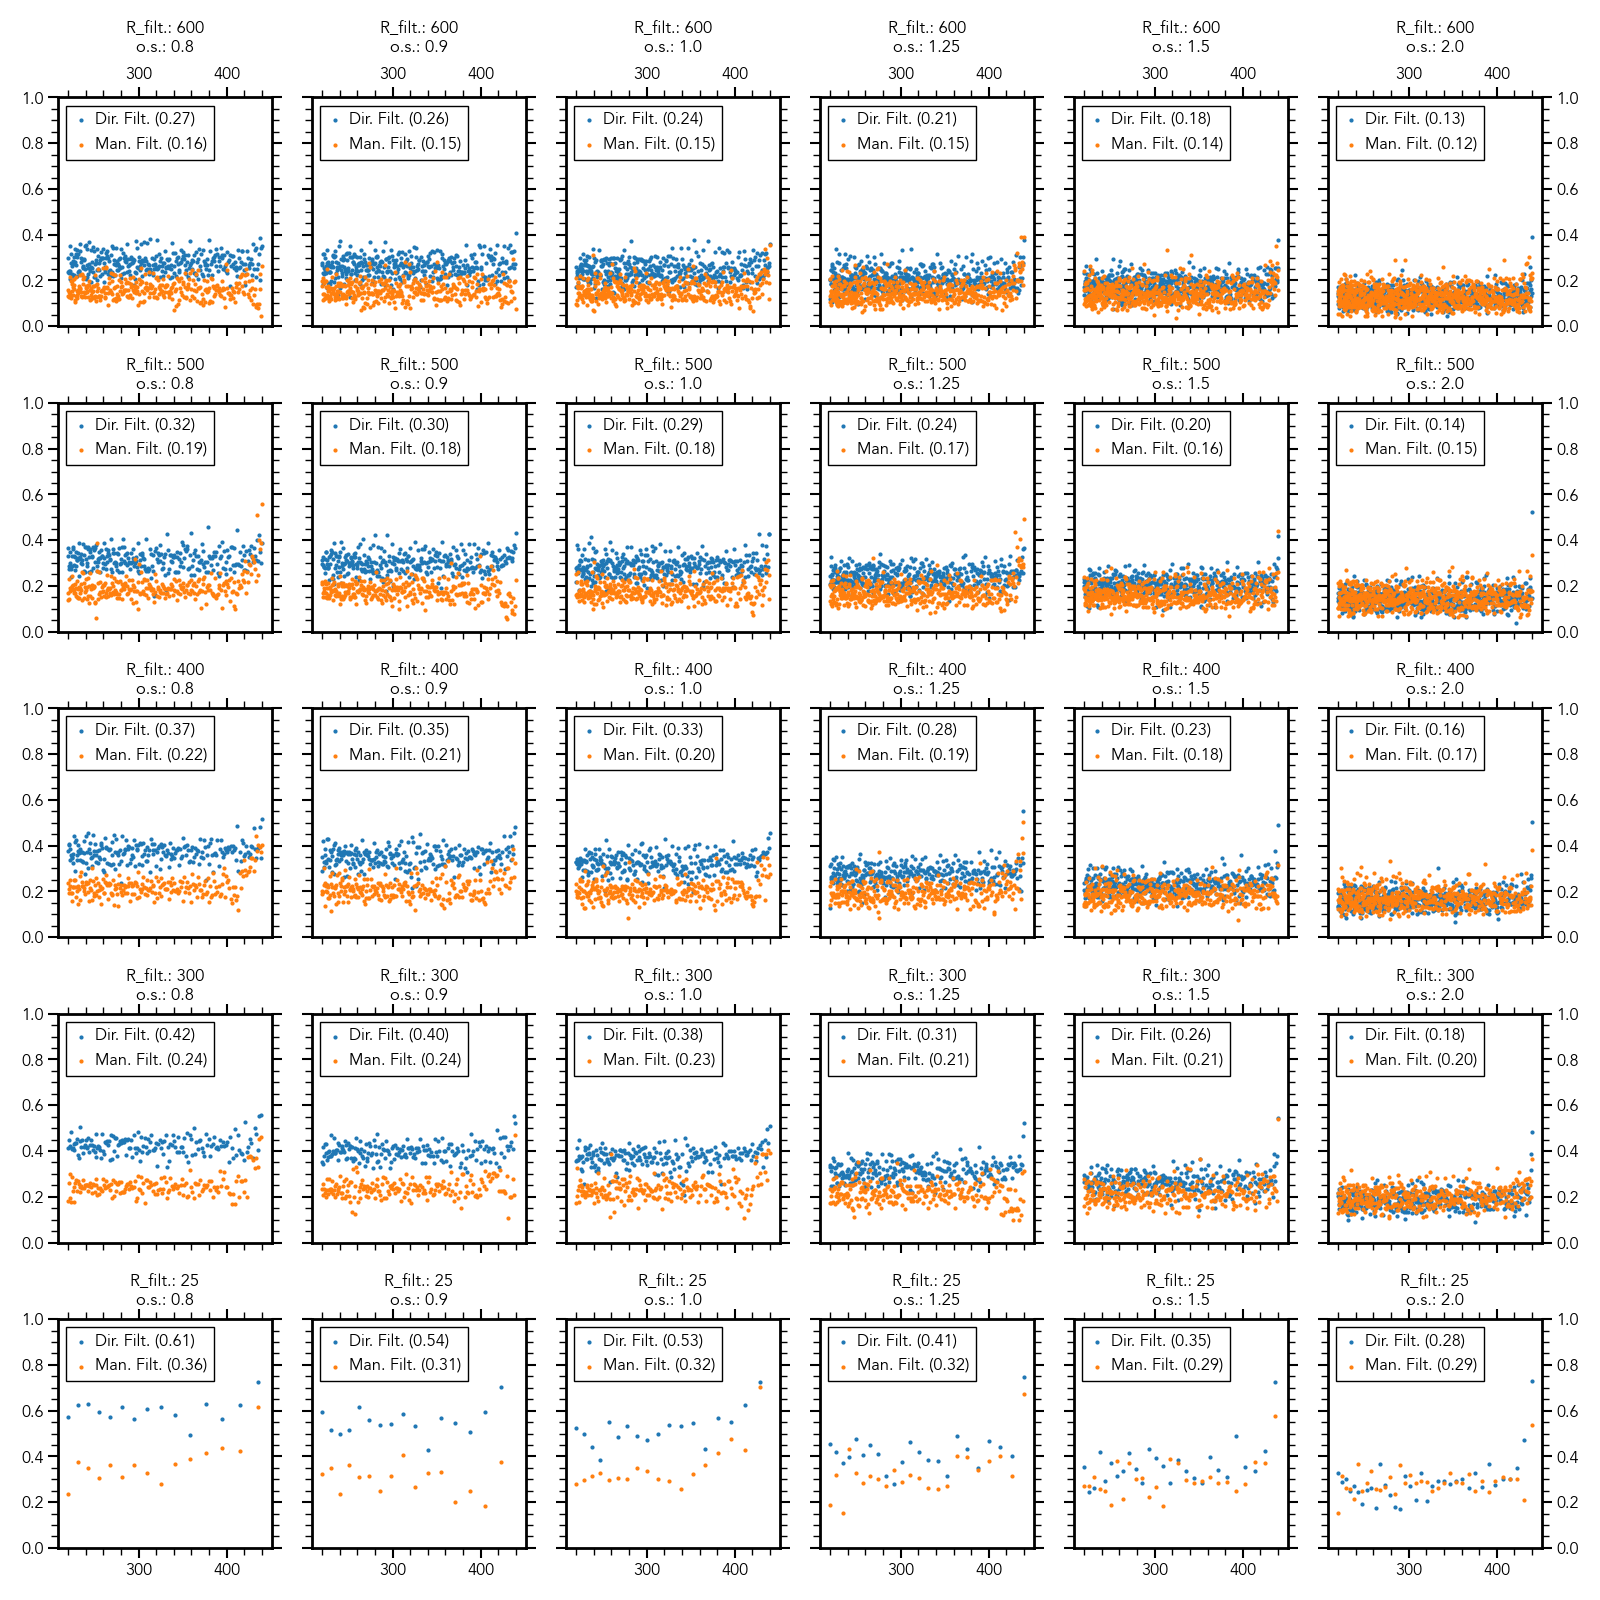

No such comm: 232a81a4cf2c4df89eb4eaad29330e34


In [9]:
plt.close("all")
fig_df0 = plt.figure(figsize=(10,10))
gs_df0 = fig_df0.add_gridspec(nRx,nRy)

fig_dQl = plt.figure(figsize=(10,10))
gs_dQl = fig_dQl.add_gridspec(nRx,nRy)

fig_eta = plt.figure(figsize=(16,16))
gs_eta = fig_eta.add_gridspec(nRx,nRy)

for i, Rx in enumerate(Rx_filter):
    for j, Ry in enumerate(Ry_spacing[i,:]):

        df_norm = f0_grid[i,j]/Rx
        df0_DF = (f0_DF_grid[i,j]-f0_grid[i,j])/df_norm
        df0_MF = (f0_MF_grid[i,j]-f0_grid[i,j])/df_norm

        dQl_DF = (Ql_DF_grid[i,j]-Rx)/Rx
        dQl_MF = (Ql_MF_grid[i,j]-Rx)/Rx
        
        ax_df0 = fig_df0.add_subplot(gs_df0[i,j])
        ax_dQl = fig_dQl.add_subplot(gs_dQl[i,j])
        ax_eta = fig_eta.add_subplot(gs_eta[i,j])

        ax_df0.scatter(f0_grid[i,j]/1e9,df0_DF)
        ax_df0.scatter(f0_grid[i,j]/1e9,df0_MF)
        ax_dQl.scatter(f0_grid[i,j]/1e9,dQl_DF)
        ax_dQl.scatter(f0_grid[i,j]/1e9,dQl_MF)
        ax_eta.scatter(f0_grid[i,j]/1e9,eta_DF_grid[i,j],label=f"Dir. Filt. ({np.median(eta_DF_grid[i,j]):.2f})")
        ax_eta.scatter(f0_grid[i,j]/1e9,eta_MF_grid[i,j],label=f"Man. Filt. ({np.median(eta_MF_grid[i,j]):.2f})")
        ax_eta.legend(loc="upper left")
        ax_eta.set_title(f"R_filt.: {Rx}\no.s.: {Ry/Rx}",size=12)
        

format_compact_grid(fig_df0)
format_compact_grid(fig_dQl)
format_compact_grid(fig_eta)

fig_df0.axes[0].set_ylim(-1,1)
fig_dQl.axes[0].set_ylim(-1,1)
fig_eta.axes[0].set_ylim(0,1)
    
    # For boxplot or violinplot
    # ax.tick_params(axis="x",which="minor",length=0)

plt.close(fig_df0)
plt.close(fig_dQl)

(0.0, 1.0)

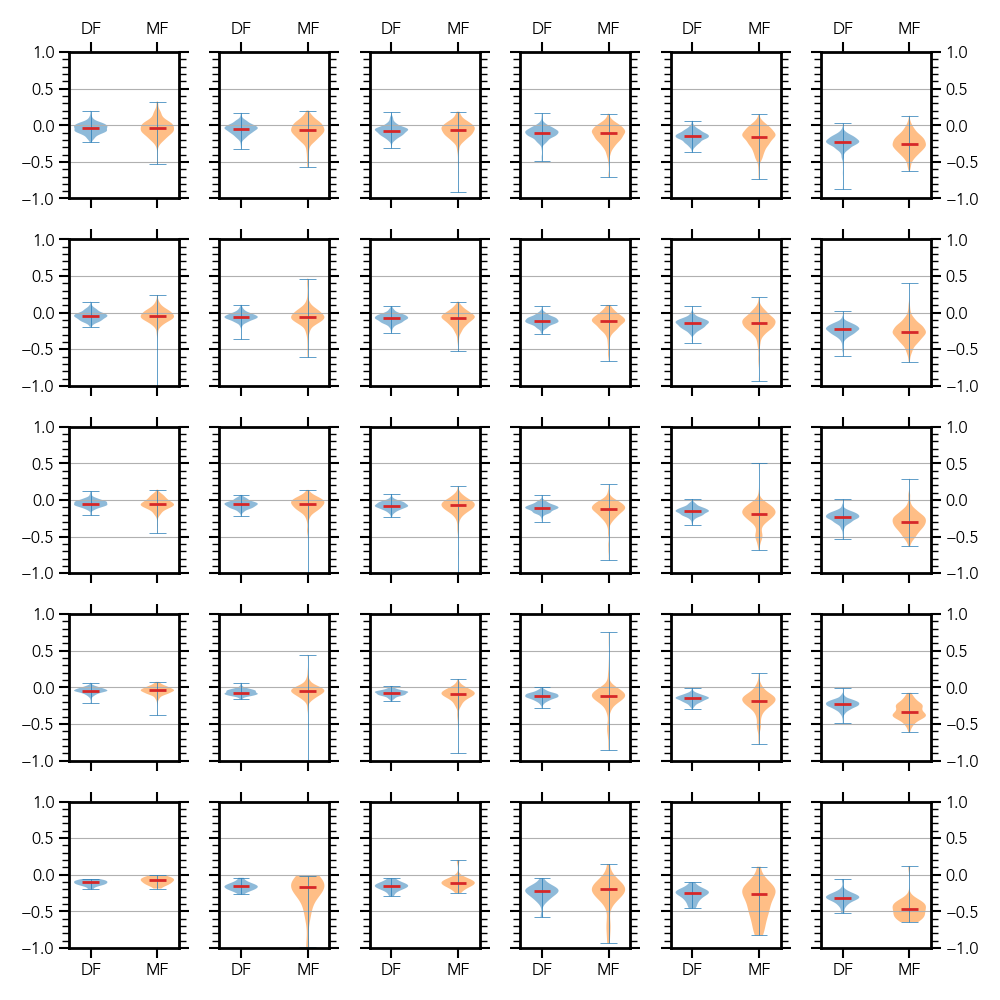

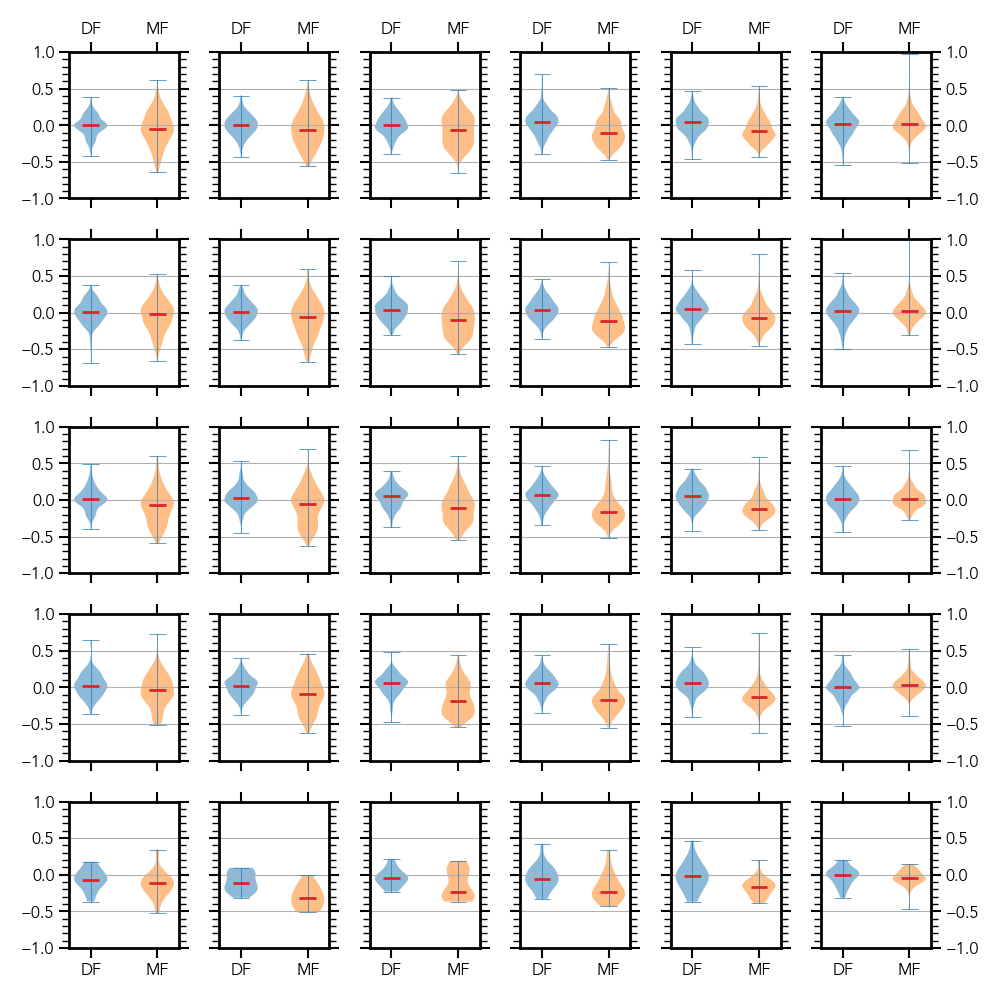

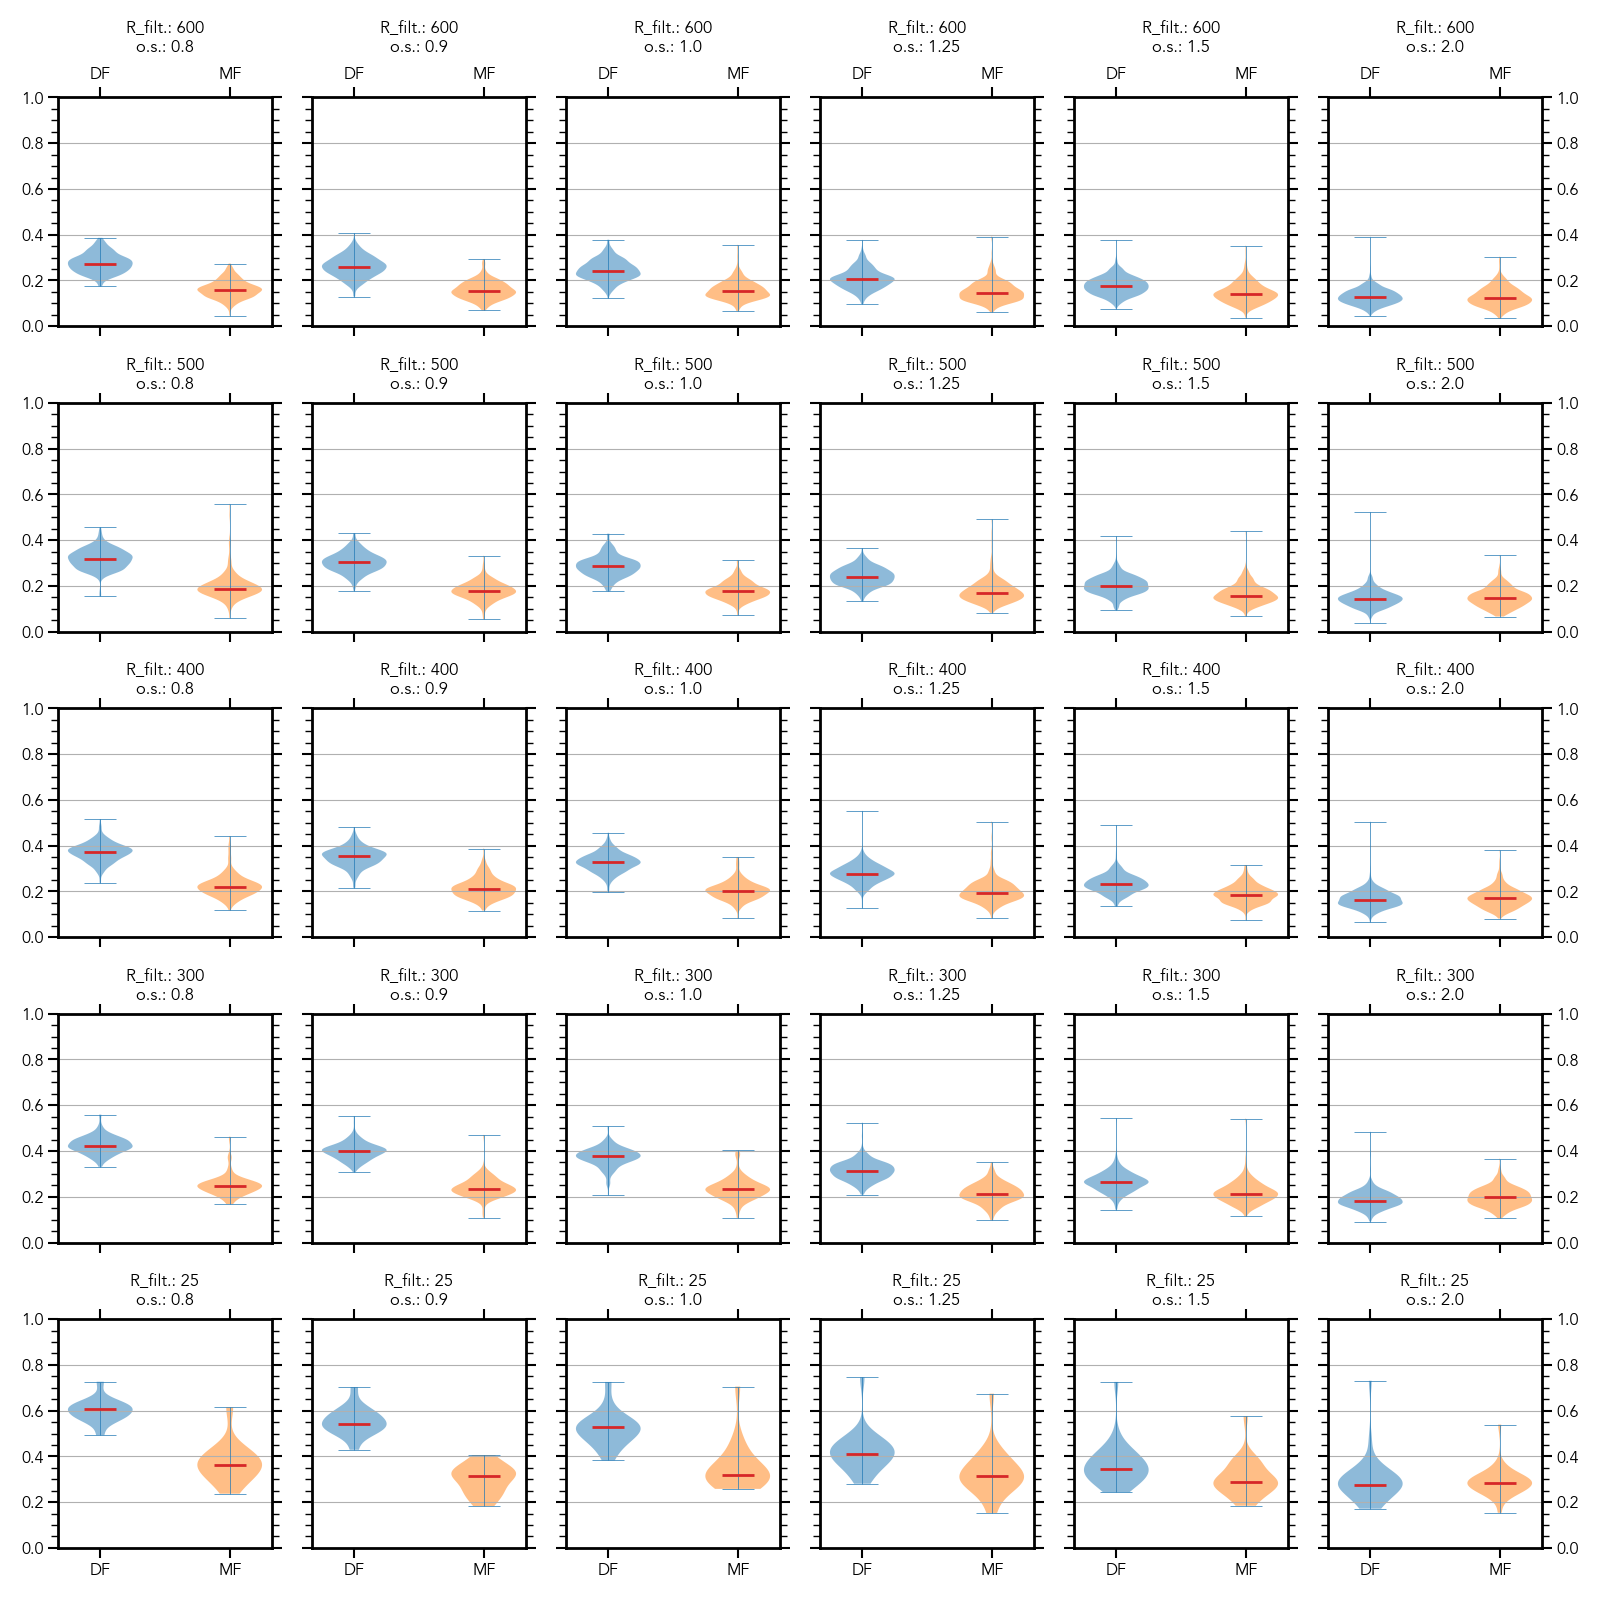

No such comm: 767a74ab00024471b119226266f4d8ff


In [10]:
plt.close("all")
fig_df0 = plt.figure(figsize=(10,10))
gs_df0 = fig_df0.add_gridspec(nRx,nRy)

fig_dQl = plt.figure(figsize=(10,10))
gs_dQl = fig_dQl.add_gridspec(nRx,nRy)

fig_eta = plt.figure(figsize=(16,16))
gs_eta = fig_eta.add_gridspec(nRx,nRy)

for i, Rx in enumerate(Rx_filter):
    for j, Ry in enumerate(Ry_spacing[i,:]):

        df_norm = f0_grid[i,j]/Rx
        df0_DF = (f0_DF_grid[i,j]-f0_grid[i,j])/df_norm
        df0_MF = (f0_MF_grid[i,j]-f0_grid[i,j])/df_norm

        dQl_DF = (Ql_DF_grid[i,j]-Rx)/Rx
        dQl_MF = (Ql_MF_grid[i,j]-Rx)/Rx
        
        ax_df0 = fig_df0.add_subplot(gs_df0[i,j])
        ax_dQl = fig_dQl.add_subplot(gs_dQl[i,j])
        ax_eta = fig_eta.add_subplot(gs_eta[i,j])

        violinlabels = ["DF","MF"]
        violinplot_pretty(ax_df0,[df0_DF,df0_MF],violinlabels)
        violinplot_pretty(ax_dQl,[dQl_DF,dQl_MF],violinlabels)
        violinplot_pretty(ax_eta,[eta_DF_grid[i,j],eta_MF_grid[i,j]],violinlabels)
        ax_eta.set_title(f"R_filt.: {Rx}\no.s.: {Ry/Rx}",size=12)


format_compact_grid(fig_df0)
format_compact_grid(fig_dQl)
format_compact_grid(fig_eta)

fig_df0.axes[0].set_ylim(-1,1)
fig_dQl.axes[0].set_ylim(-1,1)
fig_eta.axes[0].set_ylim(0,1)
    
    # For boxplot or violinplot
    # ax.tick_params(axis="x",which="minor",length=0)

# plt.close(fig_df0)
# plt.close(fig_dQl)

(0.0, 1.0)

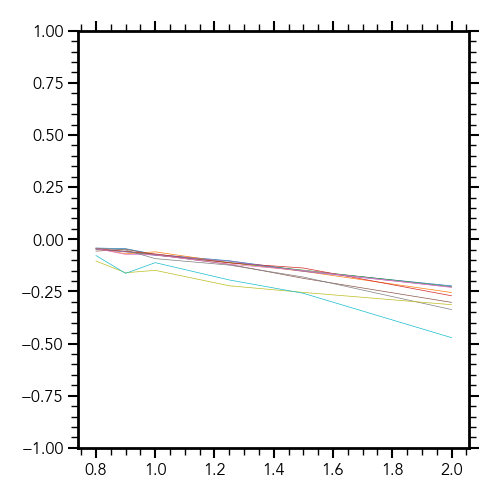

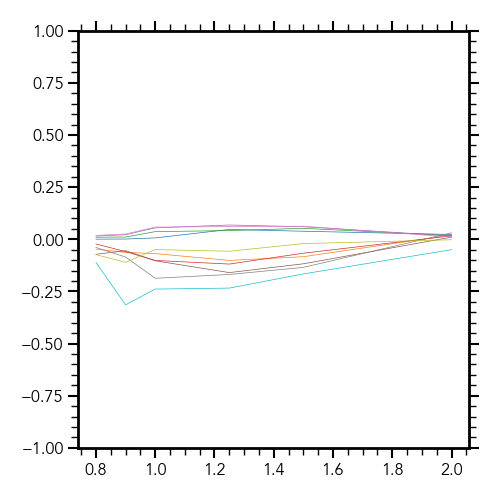

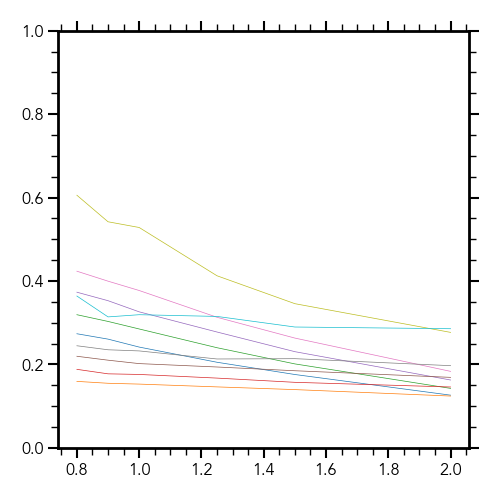

In [11]:
plt.close("all")
fig_df0 = plt.figure(figsize=(5,5))
gs_df0 = fig_df0.add_gridspec(1,1)

fig_dQl = plt.figure(figsize=(5,5))
gs_dQl = fig_dQl.add_gridspec(1,1)

fig_eta = plt.figure(figsize=(5,5))
gs_eta = fig_eta.add_gridspec(1,1)

df0_DF_median = np.empty((nRx,nRy))
df0_MF_median = np.empty((nRx,nRy))
dQl_DF_median = np.empty((nRx,nRy))
dQl_MF_median = np.empty((nRx,nRy))
eta_DF_median = np.empty((nRx,nRy))
eta_MF_median = np.empty((nRx,nRy))

for i, Rx in enumerate(Rx_filter):
    for j, Ry in enumerate(Ry_spacing[i,:]):

        df_norm = f0_grid[i,j]/Rx
        df0_DF = (f0_DF_grid[i,j]-f0_grid[i,j])/df_norm
        df0_MF = (f0_MF_grid[i,j]-f0_grid[i,j])/df_norm

        dQl_DF = (Ql_DF_grid[i,j]-Rx)/Rx
        dQl_MF = (Ql_MF_grid[i,j]-Rx)/Rx

        df0_DF_median[i,j] = np.median(df0_DF)
        df0_MF_median[i,j] = np.median(df0_MF)
        dQl_DF_median[i,j] = np.median(dQl_DF)
        dQl_MF_median[i,j] = np.median(dQl_MF)
        eta_DF_median[i,j] = np.median(eta_DF_grid[i,j])
        eta_MF_median[i,j] = np.median(eta_MF_grid[i,j])


ax_df0 = fig_df0.add_subplot(gs_df0[0,0])
ax_dQl = fig_dQl.add_subplot(gs_dQl[0,0])
ax_eta = fig_eta.add_subplot(gs_eta[0,0])

for i, Rx in enumerate(Rx_filter):
    ax_df0.plot(os,df0_DF_median[i,:])
    ax_df0.plot(os,df0_MF_median[i,:])
    ax_dQl.plot(os,dQl_DF_median[i,:])
    ax_dQl.plot(os,dQl_MF_median[i,:])
    ax_eta.plot(os,eta_DF_median[i,:])
    ax_eta.plot(os,eta_MF_median[i,:])



fig_df0.axes[0].set_ylim(-1,1)
fig_dQl.axes[0].set_ylim(-1,1)
fig_eta.axes[0].set_ylim(0,1)
    
    # For boxplot or violinplot
    # ax.tick_params(axis="x",which="minor",length=0)

# plt.close(fig_df0)
# plt.close(fig_dQl)

No such comm: 74cb3967501642b4922d61a247060b58


TypeError: Axes3D.plot_surface() missing 2 required positional arguments: 'Y' and 'Z'

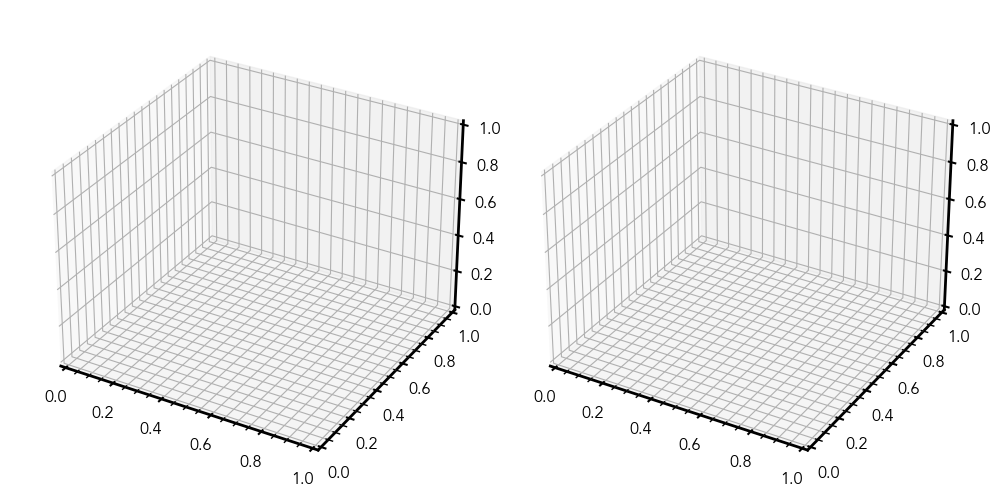

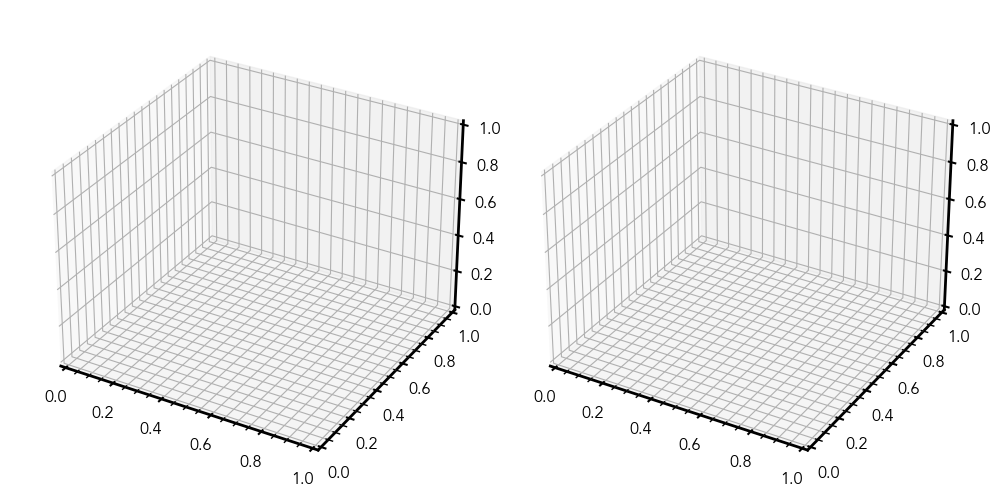

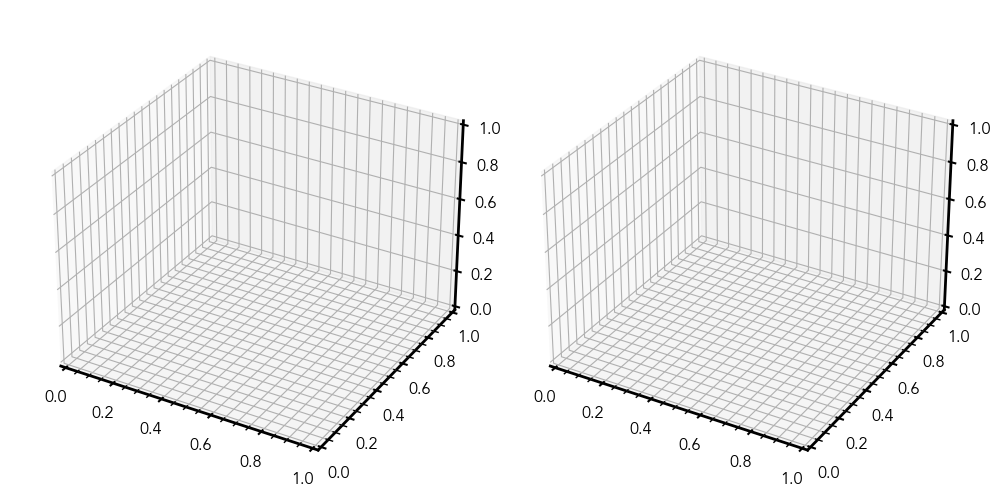

No such comm: 93bed98a61d048febde8d9793862702a
No such comm: 85e11cbdcc8a40199d116b384380620b
No such comm: 9484a8b31327401db2beb12f3d69c42b


In [12]:
plt.close("all")
fig_df0 = plt.figure(figsize=(10,5))
gs_df0 = fig_df0.add_gridspec(1,2)

fig_dQl = plt.figure(figsize=(10,5))
gs_dQl = fig_dQl.add_gridspec(1,2)

fig_eta = plt.figure(figsize=(10,5))
gs_eta = fig_eta.add_gridspec(1,2)

df0_DF_median = np.empty((nRx,nRy))
df0_MF_median = np.empty((nRx,nRy))
dQl_DF_median = np.empty((nRx,nRy))
dQl_MF_median = np.empty((nRx,nRy))
eta_DF_median = np.empty((nRx,nRy))
eta_MF_median = np.empty((nRx,nRy))

for i, Rx in enumerate(Rx_filter):
    for j, Ry in enumerate(Ry_spacing[i,:]):

        df_norm = f0_grid[i,j]/Rx
        df0_DF = (f0_DF_grid[i,j]-f0_grid[i,j])/df_norm
        df0_MF = (f0_MF_grid[i,j]-f0_grid[i,j])/df_norm

        dQl_DF = (Ql_DF_grid[i,j]-Rx)/Rx
        dQl_MF = (Ql_MF_grid[i,j]-Rx)/Rx

        df0_DF_median[i,j] = np.median(df0_DF)
        df0_MF_median[i,j] = np.median(df0_MF)
        dQl_DF_median[i,j] = np.median(dQl_DF)
        dQl_MF_median[i,j] = np.median(dQl_MF)
        eta_DF_median[i,j] = np.median(eta_DF_grid[i,j])
        eta_MF_median[i,j] = np.median(eta_MF_grid[i,j])


ax_df0_DF = fig_df0.add_subplot(gs_df0[0,0],projection="3d")
ax_df0_MF = fig_df0.add_subplot(gs_df0[0,1],projection="3d")
ax_dQl_DF = fig_dQl.add_subplot(gs_dQl[0,0],projection="3d")
ax_dQl_MF = fig_dQl.add_subplot(gs_dQl[0,1],projection="3d")
ax_eta_DF = fig_eta.add_subplot(gs_eta[0,0],projection="3d")
ax_eta_MF = fig_eta.add_subplot(gs_eta[0,1],projection="3d")


ax_df0_DF.plot_surface(df0_DF_median)
ax_df0_MF.plot_surface(df0_MF_median)
ax_dQl_DF.plot_surface(dQl_DF_median)
ax_dQl_MF.plot_surface(dQl_MF_median)
ax_eta_DF.plot_surface(eta_DF_median)
ax_eta_MF.plot_surface(eta_MF_median)



# fig_df0.axes[0].set_ylim(-1,1)
# fig_dQl.axes[0].set_ylim(-1,1)
# fig_eta.axes[0].set_ylim(0,1)
    
    # For boxplot or violinplot
    # ax.tick_params(axis="x",which="minor",length=0)

# plt.close(fig_df0)
# plt.close(fig_dQl)